# STEP GL RECONSTRUCTION

In [33]:
from final_model import AudioDataset
from util import audio_utilities as au
import matplotlib.pyplot as plt
import numpy as np
import librosa as li
from IPython.display import Audio

In [3]:
GC = AudioDataset("../notebooks/motu/motu_dataset/*.wav", process=False, slice_size=128)

In [84]:
X = GC[0]

def show_spec(X):
    plt.figure(figsize=(15,10))
    plt.imshow(X, origin="lower", aspect="auto")
    plt.show()
    
def GL_1pass(X, partial=False):
    N = X.shape[0]
    
    x = au.istft_for_reconstruction(X, 2048, 256)
    X_ = au.stft_for_reconstruction(x, 2048, 256)
    
    if partial:
        angle = np.angle(X_)
        Y = abs(X).astype(complex)
        Y[N//2:] *= np.exp(1j*angle[N//2:])
        Y[:N//2] = X[:N//2]
    else:
        angle = np.angle(X_)
        Y = abs(X).astype(complex)
        Y *= np.exp(1j*angle)
        
    return Y

def GL(X, iteration, partial=False):
    X = X.astype(complex)
    for i in range(iteration):
        X = GL_1pass(X, partial=partial)
    return X

def rec(X):
    return au.istft_for_reconstruction(X, 2048, 256)
    
    
    
mel = li.filters.mel(22050, 2048, 500)
X = mel.T.dot(X).T.astype(complex)
X_ = np.copy(X)

In [85]:
slice_size = 4

X[:slice_size] = GL(X[:slice_size], 200, partial=False)

for i in range(1,X.shape[0]//slice_size):
    print(i)
    X[slice_size*(i-1):slice_size*(i+1)] = GL(X[slice_size*(i-1):slice_size*(i+1)], 200, partial=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [86]:
y = rec(X)
y_ = au.reconstruct_signal_griffin_lim(X_, 2048, 256, 200)

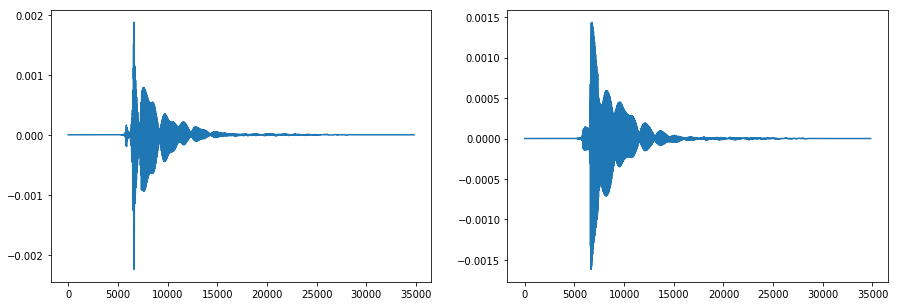

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(y)
plt.subplot(122)
plt.plot(y_)
plt.show()

In [88]:
Audio(np.concatenate([y,y_]), rate=22050)